In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import pickle
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.feature import hog
from scipy.ndimage.measurements import label
from project_functions import *
# Read trained model by the Linear SVM
dist_pickle = pickle.load( open( "svc_model.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]

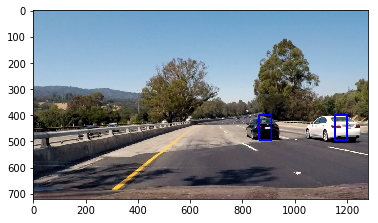

In [10]:
import math
import collections
# heatmaps = collections.deque(maxlen=5)
ystart = 400
ystop = 656
scale = 1.5
orient = 11  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
def Image_Process(image):
    out_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient,
                                  pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
#     heatmaps.append(heat)
#     heatmap_sum = sum(heatmaps)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold = 1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img

image = mpimg.imread('test_images/test4.jpg')
plt.imshow(Image_Process(image))

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Output = 'output_test_video.mp4'

##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_video.mp4")
Clip = clip1.fl_image(Image_Process) #NOTE: this function expects color images!!
Clip.write_videofile(Output, audio=False)

[MoviePy] >>>> Building video output_test_video.mp4
[MoviePy] Writing video output_test_video.mp4


 97%|█████████▋| 38/39 [00:12<00:00,  3.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_test_video.mp4 

